# Floating point model

https://towardsdatascience.com/how-autoencoders-outperform-pca-in-dimensionality-reduction-1ae44c68b42f

## training model

In [ ]:
# Acquire MNIST data
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



In [ ]:
len(train_images)

60000

In [ ]:
# Normalize the input image so that each pixel value is between 0 to 1.
# train_images = train_images / 255.0
# test_images = test_images / 255.0

# Reshape data
import numpy as np

train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))

In [ ]:
len(train_images)

60000

In [ ]:
train_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
# Normalize data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# from tensorflow.keras import Model, Input
# from tensorflow.keras.layers import Dense

# input_dim = 28*28
# latent_vec_dim = 2

# input_layer = Input(shape=(input_dim,))

# # Define the autoencoder architecture
# # First build the encoder
# enc_layer_1 = Dense(500, activation='sigmoid')(input_layer)
# enc_layer_2 = Dense(300, activation='sigmoid')(enc_layer_1)
# enc_layer_3 = Dense(100, activation='sigmoid')(enc_layer_2)
# enc_layer_4 = Dense(latent_vec_dim, activation='tanh')(enc_layer_3)
# encoder = enc_layer_4

# # Then build the decoder
# dec_layer_1 = Dense(100, activation='sigmoid')(encoder)
# dec_layer_2 = Dense(300, activation='sigmoid')(dec_layer_1)
# dec_layer_3 = Dense(500, activation='sigmoid')(dec_layer_2)
# dec_layer_4 = Dense(input_dim, activation='sigmoid')(dec_layer_3)
# decoder = dec_layer_4

# # Connect both encoder and decoder
# autoencoder = Model(input_layer, decoder, name="Deep_Autoencoder")

# # Latent representation (Optional)
# latent_model = Model(input_layer, encoder)

# # Get summary
# model.summary()

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense

input_dim = 28*28
latent_vec_dim = 2

input_layer = Input(shape=(input_dim,))

# Define the autoencoder architecture
# First build the encoder
enc_layer_1 = Dense(500, activation='relu')(input_layer)
enc_layer_2 = Dense(300, activation='relu')(enc_layer_1)
enc_layer_3 = Dense(100, activation='relu')(enc_layer_2)
enc_layer_4 = Dense(latent_vec_dim, activation='sigmoid')(enc_layer_3)
encoder = enc_layer_4

# Then build the decoder
dec_layer_1 = Dense(100, activation='relu')(encoder)
dec_layer_2 = Dense(300, activation='relu')(dec_layer_1)
dec_layer_3 = Dense(500, activation='relu')(dec_layer_2)
dec_layer_4 = Dense(input_dim, activation='sigmoid')(dec_layer_3)
decoder = dec_layer_4

# Connect both encoder and decoder
autoencoder = Model(input_layer, decoder, name="Deep_Autoencoder")
model = autoencoder
# Latent representation (Optional)
latent_model = Model(input_layer, encoder)

# Get summary
model.summary()

Model: "Deep_Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 500)               392500    
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 2)                 202       
                                                                 
 dense_12 (Dense)            (None, 100)               300       
                                                                 
 dense_13 (Dense)            (None, 300)          

Epoch 1/20
469/469 [==============================] - 12s 22ms/step - loss: 0.2745 - val_loss: 0.2631
Epoch 2/20
469/469 [==============================] - 11s 23ms/step - loss: 0.2634 - val_loss: 0.2632
Epoch 3/20
469/469 [==============================] - 12s 25ms/step - loss: 0.2633 - val_loss: 0.2632
Epoch 4/20
469/469 [==============================] - 10s 21ms/step - loss: 0.2632 - val_loss: 0.2628
Epoch 5/20
469/469 [==============================] - 10s 21ms/step - loss: 0.2632 - val_loss: 0.2631
Epoch 6/20
469/469 [==============================] - 10s 22ms/step - loss: 0.2631 - val_loss: 0.2628
Epoch 7/20
469/469 [==============================] - 10s 21ms/step - loss: 0.2631 - val_loss: 0.2627
Epoch 8/20
469/469 [==============================] - 11s 23ms/step - loss: 0.2631 - val_loss: 0.2628
Epoch 9/20
469/469 [==============================] - 10s 22ms/step - loss: 0.2631 - val_loss: 0.2627
Epoch 10/20
469/469 [==============================] - 10s 22ms/step - loss: 0.263

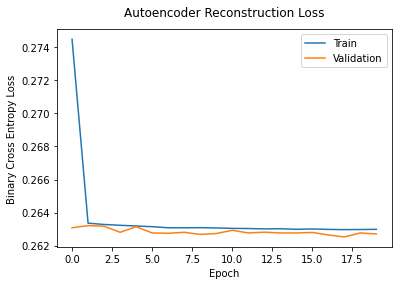

In [ ]:
# Compile the autoencoder model
model.compile(loss='binary_crossentropy', optimizer='adam')

# Train the autoencoder with MNIST data
history = model.fit(train_images, train_images, epochs=20, batch_size=128,
                          shuffle=True, validation_data=(test_images, test_images))

# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

## plot

Step 2: Apply PCA with only two components. The original dimensionality of the input data is 784.


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(train_images)
compressed_images = pca.transform(test_images)
recovered_images = pca.inverse_transform(compressed_images)

Step 3: Visualize compressed MNIST digits after PCA.

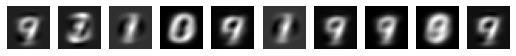

In [ ]:
# Visualize compressed MNIST digits after PCA
n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(recovered_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

Step 4: Visualize compressed MNIST digits after autoencoding.


313/313 [==============================] - 1s 4ms/step


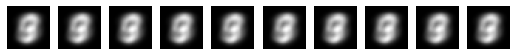

In [ ]:
# Prediçao
compressed_images = model.predict(test_images)
n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(compressed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

Step 5: Visualize test data in the latent space to see how the autoencoder model is capable of distinguishing between the nine digits in the test data.


313/313 [==============================] - 1s 3ms/step


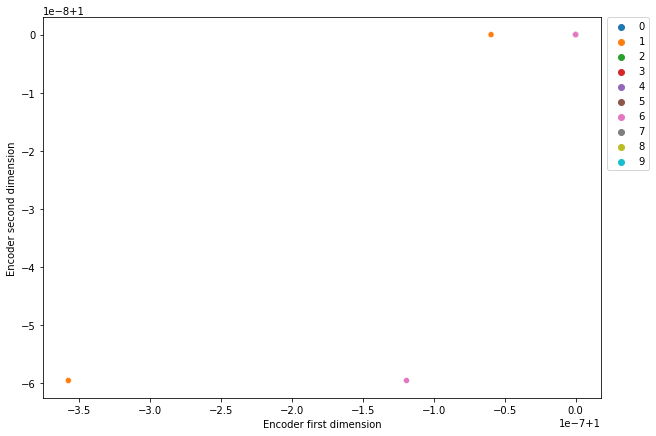

In [ ]:
latent_representation = latent_model.predict(test_images)

import seaborn as sns

plt.figure(figsize=(10, 7))

sns.scatterplot(x=latent_representation[:,0],
                y=latent_representation[:,1],
                hue=test_labels, palette='tab10')

plt.xlabel("Encoder first dimension")
plt.ylabel("Encoder second dimension")

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

# Salvando modelo

In [ ]:
model_accuracy = history.history['val_loss'][-1]
model_accuracy

0.26271089911460876

In [ ]:
import datetime
model_name = f"model_500_autoencoder_acc{str(model_accuracy)[0:7]} {datetime.datetime.now()}"
model_name

'model_500_autoencoder_acc0.26271 2023-03-21 15:33:29.353677'

In [ ]:
import os
dir_to_save = '/content/drive/MyDrive/UFSC/Autoencoder/'
# foldername = 'nome_pasta'
# model_folder = os.path.join(dir_to_save, foldername)
model_folder = dir_to_save

model_path = os.path.join(model_folder, model_name)
model_path

'/content/drive/MyDrive/UFSC/Autoencoder/model_500_autoencoder_acc0.26271 2023-03-21 15:33:29.353677'

In [ ]:
import os
model.save(model_path) # layer_config = serialize_layer_fn(layer)

In [ ]:
# !pip install pyyaml h5py  # Required to save models in HDF5 format

# # Save the entire model to a HDF5 file.
# # The '.h5' extension indicates that the model should be saved to HDF5.
# model.save(f'{model_name}.h5') 

In [ ]:
# import shutil
# shutil.copy(model_colab_path, os.path.join(model_folder, f"{model_name}.h5"))

# Load model

https://www.youtube.com/watch?v=HxtBIwfy0kM

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# model_path = os.path.join(model_folder,model_name)
# model_path = r'/content/drive/MyDrive/Projeto-TCC/Dataset/datasets-colab/models-arroz-açúcar-cafe-leite-óleo/Proprio-leakyrelu-l1l2-models-arroz-açúcar-cafe-leite-óleo1-acc0.91620 2022-03-30 00:02:51'

# model_path = r'/content/drive/MyDrive/UFSC/Autoencoder/model_500_autoencoder_acc'
# model_path = os.path.join(model_folder, model_name)
# model_path

In [ ]:
# new_model = load_model(f"{model_path}.h5")
new_model = load_model(model_path)

new_model.summary()

# Quantizing

https://www.tensorflow.org/model_optimization/guide/quantization/training_example

Clone and fine-tune pre-trained model with quantization aware training

In [ ]:
model = autoencoder

In [ ]:
!pip install -q tensorflow
!pip install -q tensorflow-model-optimization

In [ ]:
import tempfile
import os

import tensorflow as tf

from tensorflow import keras
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
# q_aware_model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
q_aware_model.compile(loss='binary_crossentropy', optimizer='adam')


q_aware_model.summary()

Train and evaluate the model against baseline

In [ ]:
train_images_subset = train_images[0:1000] # out of 60000
train_labels_subset = train_labels[0:1000]
test_images_subset = test_images[0:1000]

# q_aware_model.fit(train_images_subset, train_labels_subset,
#                   batch_size=500, epochs=1, validation_split=0.1)

history_quant = q_aware_model.fit(x = train_images, y = train_images, epochs=2, batch_size=128, 
                  shuffle=True, validation_data=(test_images, test_images))
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history_quant.history['loss'], label='Train')
plt.plot(history_quant.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

In [ ]:
# Prediçao Autoendoder Floating Point
compressed_images = model.predict(test_images)
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(compressed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

In [ ]:
# Prediçao Autoendoder Quantizado
compressed_images_q_aware = q_aware_model.predict(test_images)
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(compressed_images_q_aware[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

In [ ]:
# _, baseline_model_accuracy = model.evaluate(
#     test_images, test_images, verbose=0)

# _, q_aware_model_accuracy = q_aware_model.evaluate(
#    test_images, test_images, verbose=0)

# print('Baseline test accuracy:', baseline_model_accuracy)
# print('Quant test accuracy:', q_aware_model_accuracy)

Create quantized model for TFLite backend

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

quantized_tflite_model = converter.convert()

See persistence of accuracy from TF to TFLite

In [ ]:
import numpy as np

def evaluate_model(interpreter):
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  # Run predictions on every image in the "test" dataset.
  prediction_digits = []
  for i, test_image in enumerate(test_images):
    if i % 1000 == 0:
      print('Evaluated on {n} results so far.'.format(n=i))
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    output = interpreter.tensor(output_index)
    digit = np.argmax(output()[0])
    prediction_digits.append(digit)

  print('\n')
  # Compare prediction results with ground truth labels to calculate accuracy.
  prediction_digits = np.array(prediction_digits)
  accuracy = (prediction_digits == test_labels).mean()
  return accuracy

You evaluate the quantized model and see that the accuracy from TensorFlow persists to the TFLite backend.



In [ ]:
# interpreter = tf.lite.Interpreter(model_content=quantized_tflite_model)
# interpreter.allocate_tensors()

# test_accuracy = evaluate_model(interpreter)

# print('Quant TFLite test_accuracy:', test_accuracy)
# print('Quant TF test accuracy:', q_aware_model_accuracy)

See 4x smaller model from quantization

In [ ]:
# Create float TFLite model.
float_converter = tf.lite.TFLiteConverter.from_keras_model(model)
float_tflite_model = float_converter.convert()

# Measure sizes of models.
_, float_file = tempfile.mkstemp('.tflite')
_, quant_file = tempfile.mkstemp('.tflite')

with open(quant_file, 'wb') as f:
  f.write(quantized_tflite_model)

with open(float_file, 'wb') as f:
  f.write(float_tflite_model)

print("Float model in Mb:", os.path.getsize(float_file) / float(2**20))
print("Quantized model in Mb:", os.path.getsize(quant_file) / float(2**20))

https://www.tensorflow.org/tutorials/generative/autoencoder

# pegando pesos

https://github.com/tensorflow/model-optimization/issues/626

In [ ]:
# for layer in quantized_tflite_model.layers:
#   if hasattr(layer, 'quantize_config'):
#     for weight, quantizer, quantizer_vars in layer._weight_vars:
#         quantized_and_dequantized = quantizer(weight, training=False, weights=quantizer_vars)
#         min_var = quantizer_vars['min_var']
#         max_var = quantizer_vars['max_var']
#         quantized = dequantize(quantize_and_dequantized, min_var, max_var, quantizer)

https://stackoverflow.com/questions/69676392/how-to-access-weights-of-4-bit-qat-model

In [ ]:
weights = []
for layer in q_aware_model.layers:
  weights.append(layer.get_weights())


In [ ]:
weights[2]*256

# Creating quantized model

In [ ]:
# import tempfile
# import os

# import tensorflow as tf

# from tensorflow import keras
# import tensorflow_model_optimization as tfmot

# # quantize_model = tfmot.quantization.keras.quantize_model

# # quantiza o modelo (as camadas escolhidas).
# # autoencoder_quant = tfmot.quantization.keras.quantize_apply(autoencoder_quant)
# # latent_model_quant = tfmot.quantization.keras.quantize_apply(latent_model_quant)


In [ ]:
# # Compile the autoencoder model
# autoencoder_quant.compile(loss='binary_crossentropy', optimizer='adam')

# # Train the autoencoder with MNIST data
# history_quant = autoencoder_quant.fit(train_images, train_images, epochs=70, batch_size=128,
#                           shuffle=True, validation_data=(test_images, test_images))

# # Plot training and validation loss scores
# # against the number of epochs.
# import matplotlib.pyplot as plt
# plt.plot(history_quant.history['loss'], label='Train')
# plt.plot(history_quant.history['val_loss'], label='Validation')
# plt.ylabel('Binary Cross Entropy Loss')
# plt.xlabel('Epoch')
# plt.title('autoencoder_quant Reconstruction Loss', pad=13)
# plt.legend(loc='upper right')

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
import tensorflow_model_optimization as tfmot

In [ ]:



quantize_annotate_layer = tfmot.quantization.keras.quantize_annotate_layer

# inputs = x_train.shape[1] 
# n_classes = len(np.unique(y_train)) 

input_dim = 28*28
latent_vec_dim = 2

# def make_qnt_model():
  # model = Sequential(
  # [
input_layer = Input(shape=(input_dim,)) # Camada de entrada com numero de unidades igual ao numero de entradas, somente aplica reshape.

# quantize_annotate_layer(Flatten()),
  
# Define the autoencoder architecture
# First build the encoder
enc_layer_1_quant = quantize_annotate_layer(Dense(500, activation='relu')(input_layer))
enc_layer_2_quant = quantize_annotate_layer(Dense(300, activation='sigmoid')(enc_layer_1_quant))
enc_layer_3_quant = quantize_annotate_layer(Dense(100, activation='sigmoid')(enc_layer_2_quant))
enc_layer_4_quant = quantize_annotate_layer(Dense(latent_vec_dim, activation='tanh')(enc_layer_3_quant))
encoder_quant = enc_layer_4_quant

# Then build the decoder
dec_layer_1_quant = quantize_annotate_layer(Dense(100, activation='sigmoid')(encoder_quant))
dec_layer_2_quant = quantize_annotate_layer(Dense(300, activation='sigmoid')(dec_layer_1_quant))
dec_layer_3_quant = quantize_annotate_layer(Dense(500, activation='sigmoid')(dec_layer_2_quant))
dec_layer_4_quant = quantize_annotate_layer(Dense(input_dim, activation='sigmoid')(dec_layer_3_quant))
decoder_quant = dec_layer_4_quant

# quantize_annotate_layer(Dense(3, activation= 'relu'), quantize_config=None), # Camada oculta com x unidades e ativação Relu (QUANTIZADO).

# quantize_annotate_layer(Dense(n_classes, activation="softmax"), quantize_config=None) # Camada de saida com uma unidade para cada classe (QUANTIZADO).

  # ]
  # )
  # return model

# Connect both encoder and decoder
autoencoder_quant = Model(input_layer, decoder_quant, name="Deep_Autoencoder")

# Latent representation (Optional)
# latent_model_quant = Model(input_layer, encoder_quant)

# make_qnt_model().summary()
     

In [ ]:
for layer in autoencoder_quant.layers:
  print(layer.name, layer)


In [ ]:
print(model.layers[1].weights)
#print(model.layers[1].bias.numpy())

print(" ")
print(" ")
print(" ")

print(model.layers[2].weights) # model.layers[3].weights[1]
#print(model.layers[2].bias.numpy())

In [ ]:
# aqui é feita a quantização
for layer in model.layers:
  if hasattr(layer, 'quantize_config'):
    for weight, quantizer, quantizer_vars in layer._weight_vars:
        quantized_and_dequantized = quantizer(weight, training=False, weights=quantizer_vars)
        min_var = quantizer_vars['min_var']
        max_var = quantizer_vars['max_var']
        #quantized = dequantize(quantize_and_dequantized, min_var, max_var, quantizer)
        print(min_var, max_var)
        print(" ")
        print(quantized_and_dequantized)
        print(" ")
        print(tf.cast(quantized_and_dequantized, tf.int8, name=None))
        print(" ")

In [ ]:
%pip install fxpmath # A python library for fractional fixed-point (base 2) arithmetic and binary manipulation with Numpy compatibility.
from fxpmath import Fxp

fxp_ref = Fxp(val=None, signed=None, n_word=8, n_frac=5, n_int=2, like=None, dtype=None)

# n_word : int, optional, defualt=None, Number of the bits for binary word (sign + integer part + fractional part).

# n_frac : int, optional, default=None, Number of bits for fractional part.

# n_int : int, optional, default=None, Number of bits for integer part.


In [ ]:
# Convert all weights to fixed-point:

w_fxp_dict = {}

for layer in w_dict.keys():
  try:
    w_fxp_dict[layer] = [
          Fxp(w_dict[layer][0], like=fxp_ref), 
          Fxp(w_dict[layer][1], like=fxp_ref),
        ]
  except:
    pass

In [ ]:
for layer in w_fxp_dict:
  print(layer)
  print("------------------------------------")
  print('weights: ')
  print(w_fxp_dict[layer][0])
  print(" ")
  print('bias: ')
  print(w_fxp_dict[layer][1])
  print("------------------------------------")
  print(" ")

print("###########################################")
print(" ")

for i, layer in enumerate(model.layers[2:]):
  try:
    print(layer)
    print("------------------------------------")
    print('weights: ')
    print(layer.get_weights()[0])
    print(" ")
    print('bias: ')  
    print(layer.get_weights()[1])
    print("------------------------------------")
    print(" ")
  except:
    pass

In [ ]:
unquantized_weight, quantizer, quantizer_vars = model.layers[2]._weight_vars[0]

model.layers[1]._weight_vars

In [ ]:

print(unquantized_weight)
print(" ")
print(quantizer)
print(" ")
print(quantizer_vars)

In [ ]:

float_converter = tf.lite.TFLiteConverter.from_keras_model(model)
float_converter.optimizations = [tf.lite.Optimize.DEFAULT]
float_converter.target_spec.supported_types = [tf.uint8]
float_tflite_model = float_converter.convert()

In [ ]:
float_tflite_model


# sdsd

In [ ]:
import tensorflow as tf

def retrain_with_quantization(model_path, bit_width):
    """
    Retrains a Tensorflow model with quantization-aware training

    Parameters:
        model_path (str): The path to the model file
        bit_width (int): The bit width to use for quantization
    
    Returns:
        tf.keras.Model: The retrained model with quantization-aware training

    """
    # Load the model
    model = tf.keras.models.load_model(model_path)

    # Create a quantization-aware model
    q_aware_model = tf.quantization.quantize_model(model, quantization_bits=bit_width)

    # Compile the quantization-aware model
    q_aware_model.compile(optimizer='adam', loss='binary_crossentropy')

    # Train the quantization-aware model
    q_aware_model.fit(x_train, y_train, epochs=10, batch_size=32)

    return q_aware_model

# path to the model file
model_path = "model.h5"
# bit width to use for quantization
bit_width = 8

retrained_model = retrain_with_quantization(model_path, bit_width)